# Plots for Cumulative distributions of the Nearest Neighbor Distances and the box plot for the Entropy and Kolmogorov-Smirnov distance

In [1]:
using CSV
using DataFrames
using DataFramesMeta
using DelimitedFiles 
using FileIO 
using InformationMeasures
using LinearAlgebra 
using Lazy
using Plots
using Query
using Random
using Statistics
using StatsBase
using StatsPlots

In [2]:
include("PlottingTools.jl") #Loading functions used to compute different properties for plotting.

get_genes_ch (generic function with 1 method)

In [3]:
#Loading Plot Backend
using LaTeXStrings
pyplot(guidefont=30, titlefont=30,xtickfont=30, ytickfont=30, legendfont=30)

Plots.PyPlotBackend()

In [4]:
data_names = [" Healthy "," LumA "," LumB "," Her2 "," Basal "]
chs = ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21"]
cl = [:blue,:purple,:red,:green,:orange];

In [5]:
#getting the data for the chromosome ch=14
ch = 14
Healthy = CSV.read("Healthy/Healthy-chr$(ch)-clusters.csv") |> DataFrame!
LumA = CSV.read("LumA/LumA-chr$(ch)-clusters.csv") |> DataFrame!
LumB = CSV.read("LumB/LumB-chr$(ch)-clusters.csv") |> DataFrame!
Her2 = CSV.read("Her2/Her2-chr$(ch)-clusters.csv") |> DataFrame!
Basal = CSV.read("Basal/Basal-chr$(ch)-clusters.csv") |> DataFrame!
data_frames = [Healthy,LumA,LumB,Her2,Basal];

In [6]:
#Building the plots 
pt = plot(title="Chromosome $ch",
    legend=:bottomright,
    xlabel=L"D_{nn}",
    ylabel=L"P(x\leq D_{nn})",
    #xlims=(0,200),
    size=(1200,1000)

)
pt_s = plot(
    xtickfont=20, ytickfont=20, legendfont=20,guidefont=20,
    xlabel=L"D_{nn}",
    ylabel=L"P(x\leq D_{nn})",
    xlims=(0,12),
    ylims=(0,1),
    size=(600,600)
);


In [7]:
for i in 1:5
    nnd =get_nnd(data_frames[i][!,:clusterid]) #Getting NND distributions.
    cdf_ = ecdf(nnd)
    plot!(pt,cdf_, linewidth=3,leg=false)
    plot!(pt_s,cdf_, leg=false,linewidth=3)
end

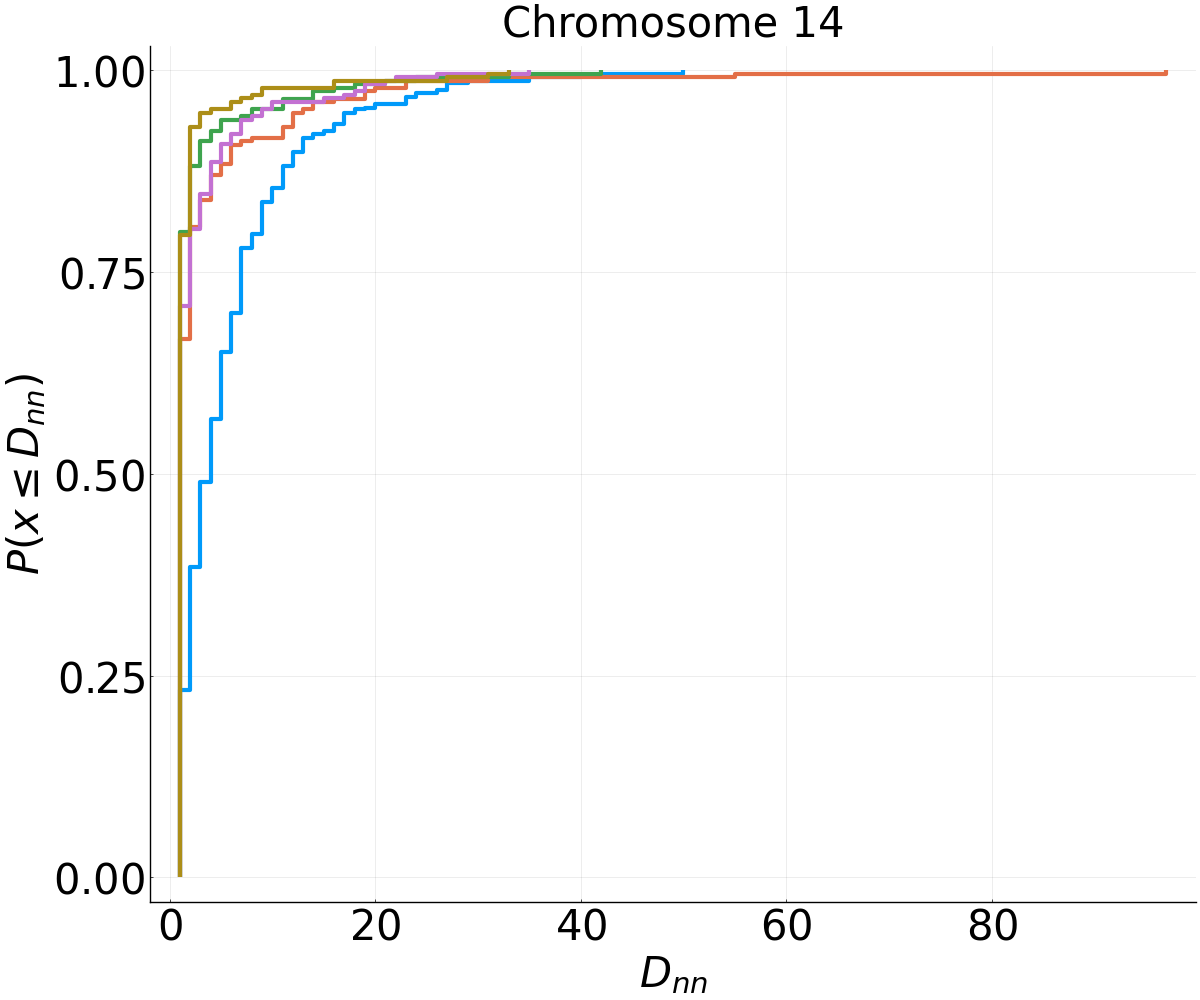

In [8]:
#Plotting the full cumulative distributions for chromosome 14
plot(pt)

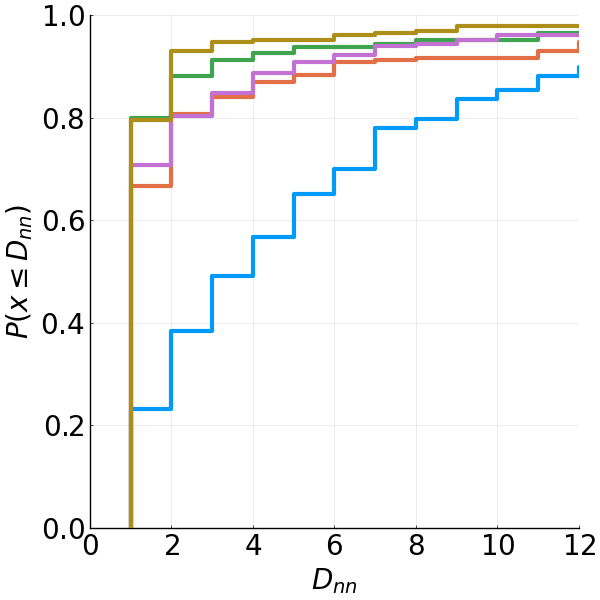

In [9]:
#Plot for an inset (zoom) for the first part of the cumulative nnd distributions
plot(pt_s)

In [10]:
#Computing shannon entropies and kolmogorov-smirnov distances.
K_S =[]
SH_E = []
for ch in chs
    Healthy = CSV.read("Healthy/Healthy-chr$(ch)-clusters.csv") |> DataFrame!
    LumA = CSV.read("LumA/LumA-chr$(ch)-clusters.csv") |> DataFrame!
    LumB = CSV.read("LumB/LumB-chr$(ch)-clusters.csv") |> DataFrame!
    Her2 = CSV.read("Her2/Her2-chr$(ch)-clusters.csv") |> DataFrame!
    Basal = CSV.read("Basal/Basal-chr$(ch)-clusters.csv") |> DataFrame!
    data_frames = [Healthy,LumA,LumB,Her2,Basal]
    
    nnds = []
    for i in 1:5
        #nnd =get_nnd(data_frames[i][!,:clusterid])
        push!(nnds,get_nnd(data_frames[i][!,:clusterid]))
    end
    ##--
    dmax = maximum(map(x-> maximum(x),nnds))
    nndists = map(x-> get_nnd_distro(x,dmax), nnds)
    H_  = map(x-> entropy(x),nndists)
    KS_ = map(x-> KS_d(nndists[1],x), nndists[2:5])
    push!(K_S, KS_)
    push!(SH_E, H_)
end
K_S =hcat(K_S...)
SH_E = hcat(SH_E...);

In [11]:
#Constructing plots for H(x)
bp = plot(
    legend=:bottomright,
    ylabel=L"H(x)",
    #xlims=(0,200),
    size=(1200,1000)

);
for i in 1:5
    boxplot!(bp,[data_names[i]],SH_E[i,:],linewidth=3,color=:lightblue, leg=false)
    dotplot!(bp, [data_names[i]],SH_E[i,:], color=:black, alpha=0.5, ms=8)
end

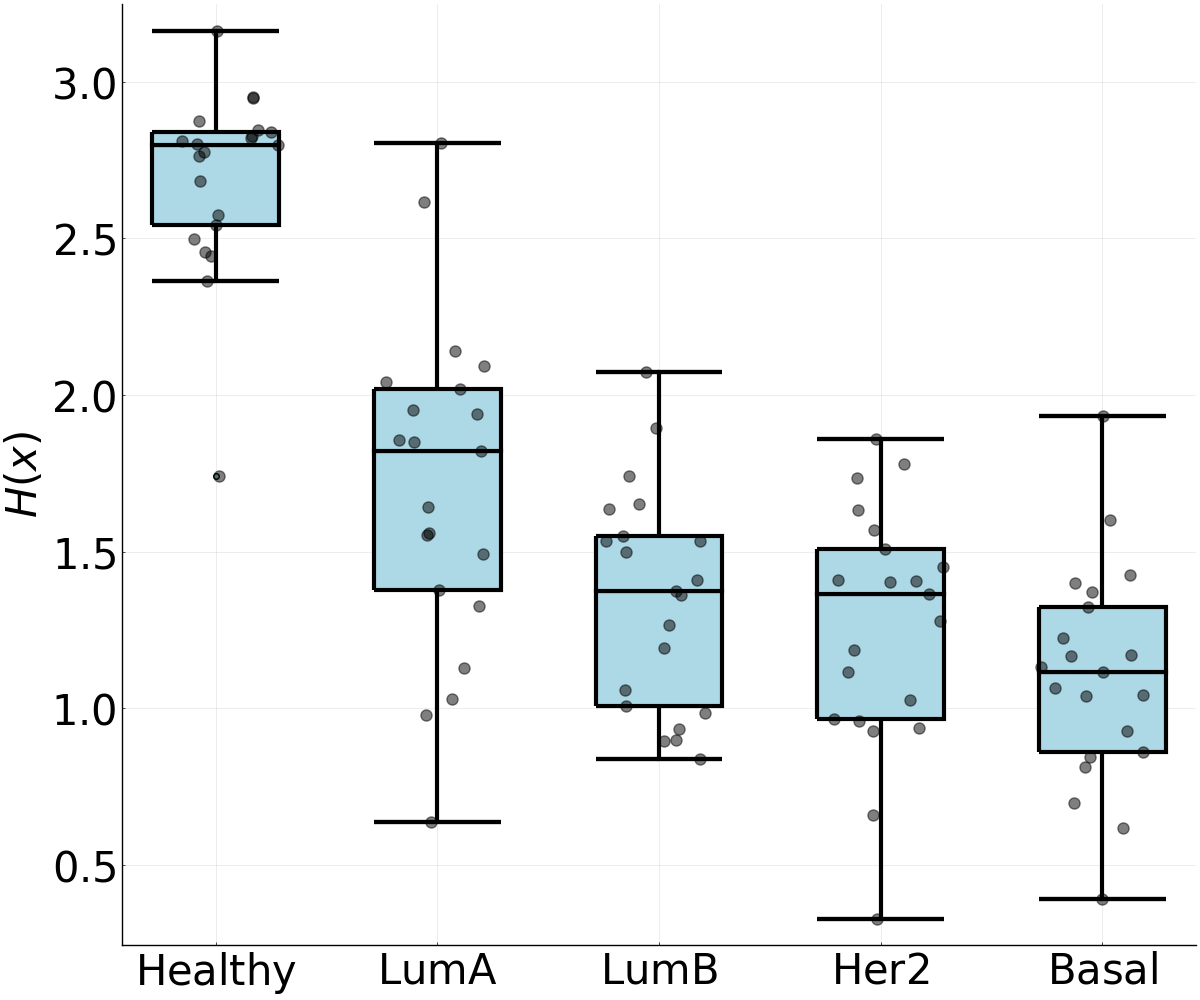

In [12]:
#Plotting boxplots of Entropies
plot(bp)

In [13]:
#constructing plots for KS
bp2 = plot(
    legend=:bottomright,
    ylabel=L"KS_{Healthy,x}",
    #xlims=(0,200),
    size=(1200,1000)

);

In [14]:
for i in 1:4
    boxplot!(bp2,[data_names[i+1]],K_S[i,:],linewidth=3,color=:green, leg=false, alpha=0.7)
    dotplot!(bp2, [data_names[i+1]],K_S[i,:], color=:black, alpha=0.5, ms=8)
end

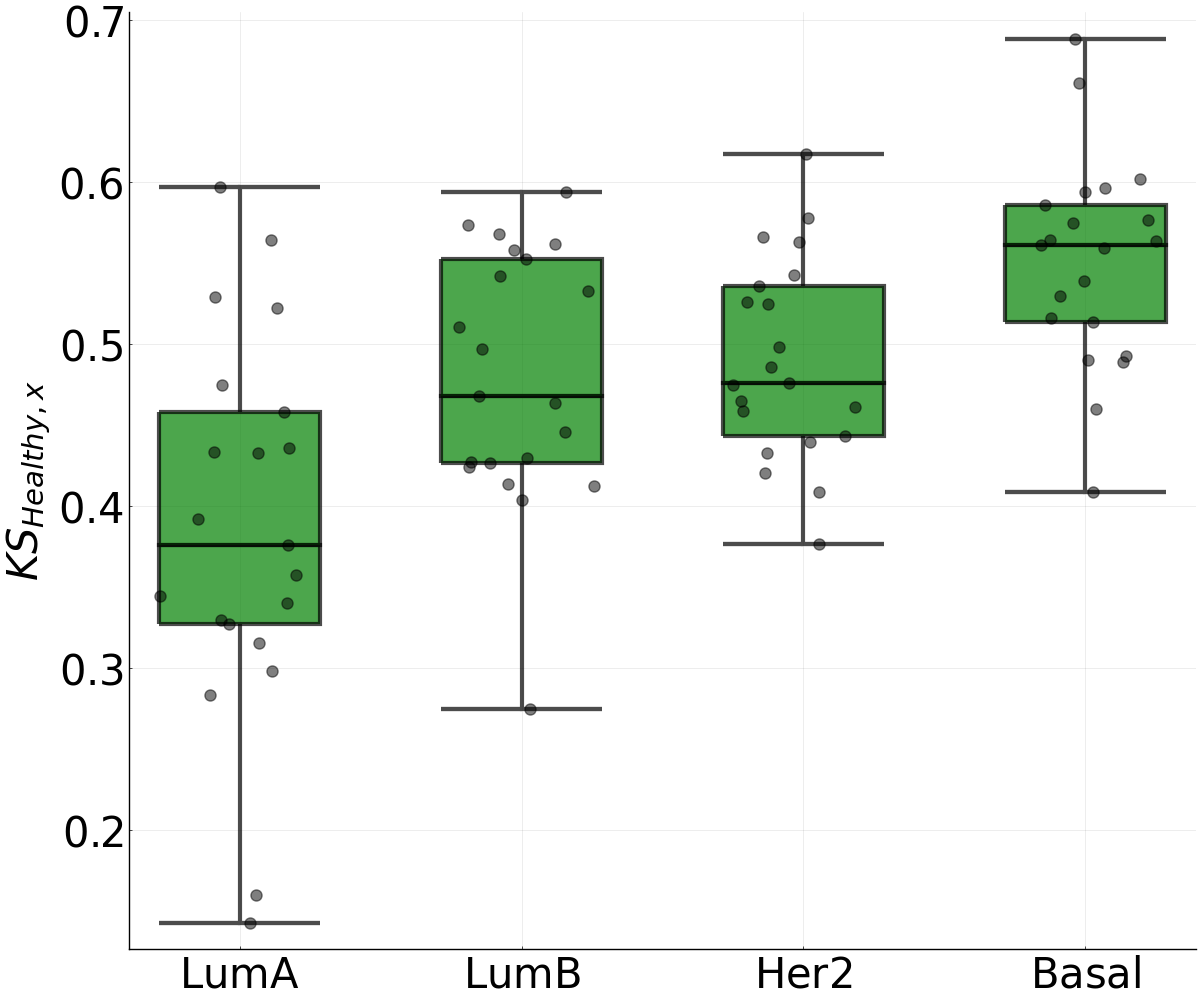

In [15]:
#plotting KS
plot(bp2)